In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
import pathlib
import cv2

In [2]:
data_dir="C:\\Users\\anuku\\OneDrive\\Desktop\\Ayushi\\train-20231024T123812Z-001"
data_dir=pathlib.Path(data_dir)

In [3]:
print(data_dir)

C:\Users\anuku\OneDrive\Desktop\Ayushi\train-20231024T123812Z-001


C:\Users\anuku\OneDrive\Desktop\Ayushi\train-20231024T123812Z-001\Corn leaf blight\00c.jpg


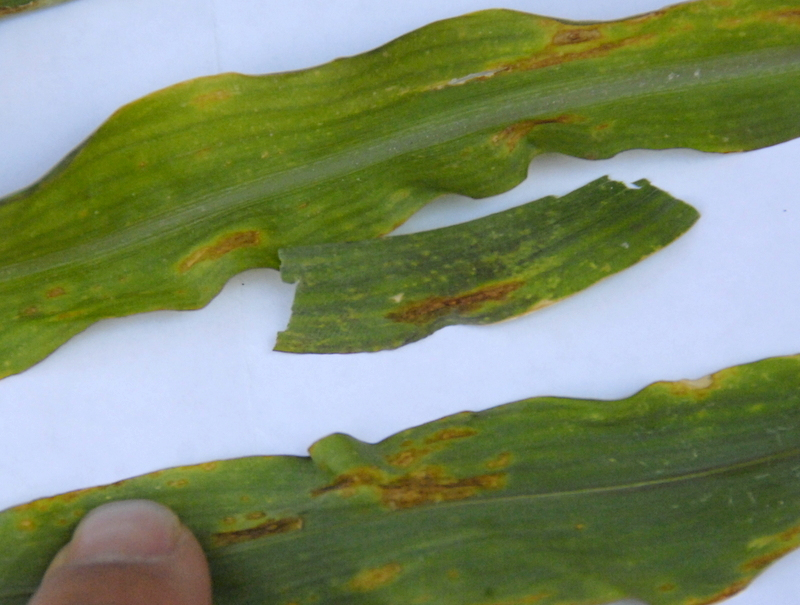

In [4]:
clb=list(data_dir.glob('Corn leaf blight/*'))
print(clb[0])
PIL.Image.open(str(clb[0]))


In [5]:
img_height,img_width=180,180
batch_size=32
train_ds= tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
label_mode='categorical',
image_size=(img_height,img_width),
batch_size=batch_size
)

Found 2339 files belonging to 28 classes.
Using 1872 files for training.


In [6]:
val_ds= tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
label_mode='categorical',
image_size=(img_height,img_width),
batch_size=batch_size
)

Found 2339 files belonging to 28 classes.
Using 467 files for validation.


In [7]:
class_names= train_ds.class_names
l = len(class_names)
print(l)
print(class_names)

28
['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf', 'grape leaf', 'grape leaf black rot']


In [8]:
resnet_model = Sequential()
pretrained_model=tf.keras.applications.ResNet50(include_top=False,
                                               input_shape=(180,180,3),
                                               pooling='avg',classes=l,
                                               weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
    
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(l,activation='softmax'))




In [9]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 28)                14364     
 apper)                                                          
                                                                 
Total params: 24651164 (94.04 MB)
Trainable params: 1063452 (4.06 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [10]:
resnet_model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
epochs=10
history= resnet_model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=epochs
)

Epoch 1/10
59/59 [==============================] - 178s 3s/step - loss: 2.5293 - accuracy: 0.3024 - val_loss: 2.0492 - val_accuracy: 0.4283
Epoch 2/10
59/59 [==============================] - 153s 3s/step - loss: 1.3207 - accuracy: 0.5913 - val_loss: 1.9929 - val_accuracy: 0.4069
Epoch 3/10
59/59 [==============================] - 292s 5s/step - loss: 0.8996 - accuracy: 0.7270 - val_loss: 1.8609 - val_accuracy: 0.4411
Epoch 4/10
59/59 [==============================] - 194s 3s/step - loss: 0.6086 - accuracy: 0.8168 - val_loss: 2.0047 - val_accuracy: 0.4475
Epoch 5/10
59/59 [==============================] - 152s 3s/step - loss: 0.4239 - accuracy: 0.8814 - val_loss: 1.9646 - val_accuracy: 0.4561
Epoch 6/10
59/59 [==============================] - 154s 3s/step - loss: 0.2683 - accuracy: 0.9423 - val_loss: 2.0715 - val_accuracy: 0.4754
Epoch 7/10
59/59 [==============================] - 180s 3s/step - loss: 0.1949 - accuracy: 0.9610 - val_loss: 1.9450 - val_accuracy: 0.4861
Epoch 8/10
59

In [12]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 28)                14364     
 apper)                                                          
                                                                 
Total params: 24651164 (94.04 MB)
Trainable params: 1063452 (4.06 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

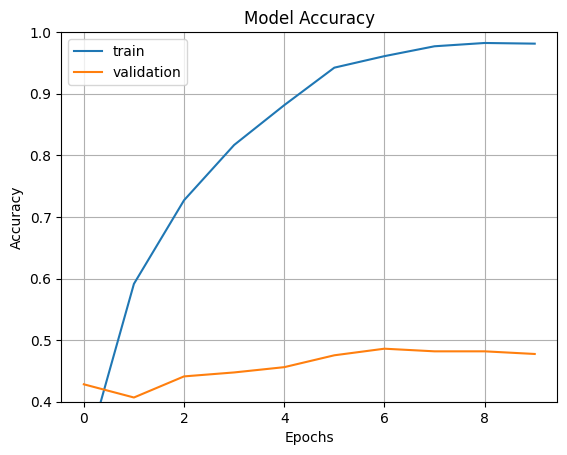

In [13]:
fig1=plt.gcf() # get current figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()
           

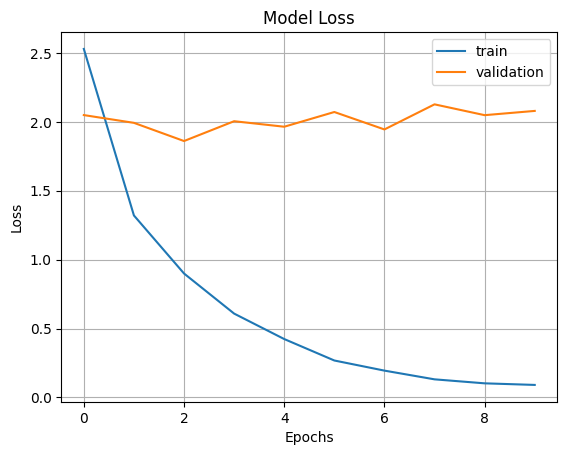

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()
           

In [15]:
image=cv2.imread(str(clb[3]))
image_resized = cv2.resize(image,(img_height,img_width))
image= np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [16]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 5s 5s/step
[[1.15982926e-04 9.44918881e-08 2.70147139e-04 4.15928696e-08
  3.81264581e-05 6.26675319e-04 2.01168064e-07 8.63363093e-05
  8.70466650e-01 1.87183360e-07 9.66382814e-08 9.91498493e-03
  4.84556928e-02 2.87261764e-06 5.02676849e-05 8.37485204e-05
  4.03864409e-09 6.35398901e-04 2.09550615e-02 8.56167753e-06
  3.88854067e-04 5.93809085e-03 3.64157022e-04 1.69308987e-02
  2.46317741e-02 6.04000570e-06 8.35841441e-09 2.90827720e-05]]


In [17]:
print(np.argmax(pred))
output_class=class_names[np.argmax(pred)]
print("The predicted class is",output_class)

8
The predicted class is Corn leaf blight


C:\Users\anuku\OneDrive\Desktop\Ayushi\train-20231024T123812Z-001\grape leaf\000g.jpg


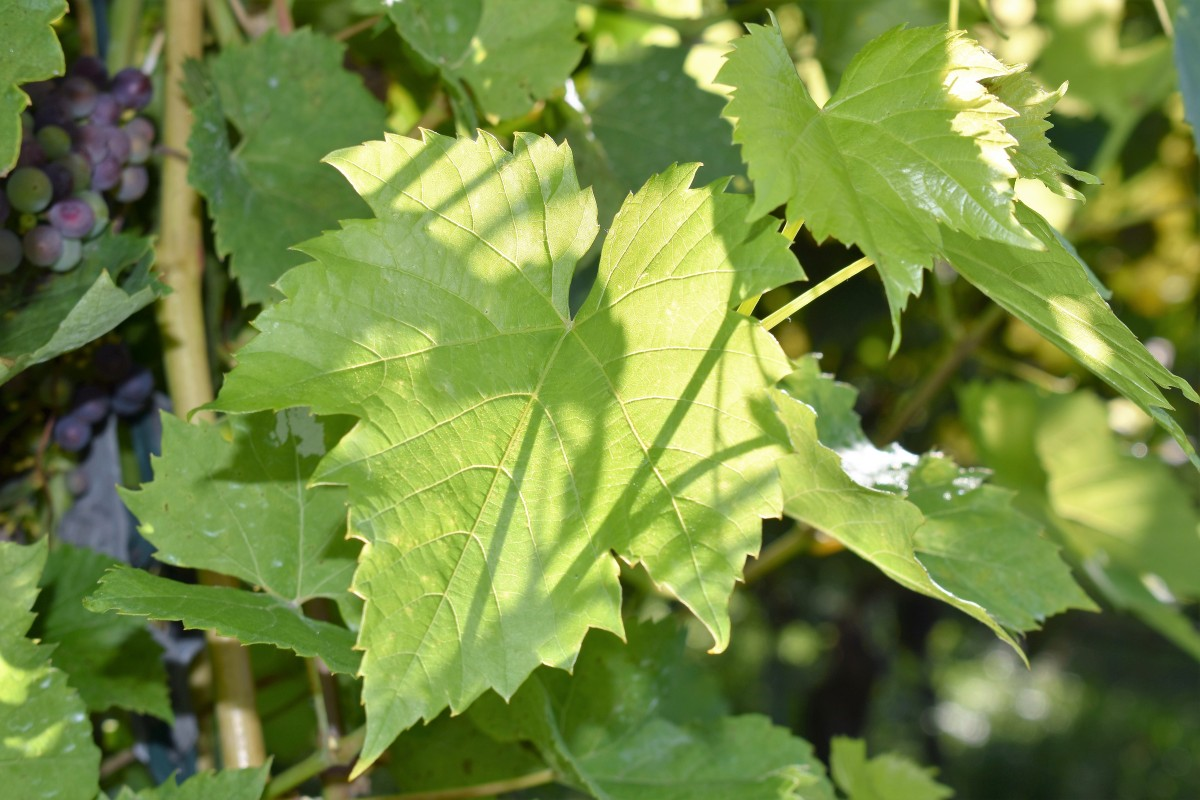

In [18]:
gl=list(data_dir.glob('grape leaf/*'))
print(gl[0])
PIL.Image.open(str(gl[0]))


In [19]:
image=cv2.imread(str(gl[3]))
image_resized = cv2.resize(image,(img_height,img_width))
image= np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [20]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 313ms/step
[[2.2391906e-07 4.8101155e-04 1.7679913e-06 2.0651538e-07 1.8524539e-06
  8.7169894e-07 6.6045366e-05 2.9267680e-05 3.9236502e-06 1.1731133e-06
  1.0155084e-06 5.7980128e-07 7.7032291e-07 2.3197418e-03 1.7615185e-06
  6.8356064e-07 1.4932026e-03 1.1544710e-08 9.9377903e-06 3.0271907e-03
  8.3597476e-04 5.9314237e-07 3.0576030e-05 6.2334300e-05 4.4642456e-06
  8.5137697e-07 9.9119276e-01 4.3129275e-04]]


In [21]:
print(np.argmax(pred))
output_class=class_names[np.argmax(pred)]
print("The predicted class is",output_class)

26
The predicted class is grape leaf


In [22]:
tl=list(data_dir.glob('Tomato leaf/*'))
print(tl)
print(tl[0])
PIL.Image.open(str(tl[0]))

image=cv2.imread(str(tl[0]))
image_resized = cv2.resize(image,(img_height,img_width))
image= np.expand_dims(image_resized,axis=0)
print(image.shape)

pred=resnet_model.predict(image)
print(pred)


print(np.argmax(pred))
output_class=class_names[np.argmax(pred)]
print("The predicted class is",output_class)


[WindowsPath('C:/Users/anuku/OneDrive/Desktop/Ayushi/train-20231024T123812Z-001/Tomato leaf/003.JPG.jpg'), WindowsPath('C:/Users/anuku/OneDrive/Desktop/Ayushi/train-20231024T123812Z-001/Tomato leaf/009-e1373768789869.jpg'), WindowsPath('C:/Users/anuku/OneDrive/Desktop/Ayushi/train-20231024T123812Z-001/Tomato leaf/100_8283.jpg'), WindowsPath('C:/Users/anuku/OneDrive/Desktop/Ayushi/train-20231024T123812Z-001/Tomato leaf/15481477375.jpg'), WindowsPath('C:/Users/anuku/OneDrive/Desktop/Ayushi/train-20231024T123812Z-001/Tomato leaf/1686.jpg'), WindowsPath('C:/Users/anuku/OneDrive/Desktop/Ayushi/train-20231024T123812Z-001/Tomato leaf/1688.jpg'), WindowsPath('C:/Users/anuku/OneDrive/Desktop/Ayushi/train-20231024T123812Z-001/Tomato leaf/17371378-tomato-leaf.jpg'), WindowsPath('C:/Users/anuku/OneDrive/Desktop/Ayushi/train-20231024T123812Z-001/Tomato leaf/2013-08-20-03.jpg'), WindowsPath('C:/Users/anuku/OneDrive/Desktop/Ayushi/train-20231024T123812Z-001/Tomato leaf/2013-08-20-04.jpg'), WindowsPat

## Testing model on test dataset

In [23]:
test_dir="C:\\Users\\anuku\\OneDrive\\Desktop\\Ayushi\\test-20231024T123656Z-001"
test_dir=pathlib.Path(test_dir)

In [24]:
print(test_dir)

C:\Users\anuku\OneDrive\Desktop\Ayushi\test-20231024T123656Z-001


In [25]:
img_height,img_width=180,180
batch_size=32
lds= tf.keras.preprocessing.image_dataset_from_directory(
test_dir,
validation_split=0.2,
subset="training",
seed=123,
label_mode='categorical',
image_size=(img_height,img_width),
batch_size=batch_size
)

Found 238 files belonging to 28 classes.
Using 191 files for training.


In [26]:
labels = lds.class_names
len_of_label = len(labels)
print(labels)

['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf', 'grape leaf', 'grape leaf black rot']


In [27]:
dff = pd.DataFrame(columns=['Labels','True Value','False Value','Total Value']) # creating empty data frame with some column

In [28]:
for i in range(len_of_label):
    tl=list(test_dir.glob(f'{labels[i]}/*'))
    len_of_tl =len(tl)
    t = 0
    f = 0
    for j in range(len_of_tl):
        # PIL.Image.open(str(tl[0]))
        image=cv2.imread(str(tl[j]))
        image_resized = cv2.resize(image,(img_height,img_width))
        image= np.expand_dims(image_resized,axis=0)
        pred=resnet_model.predict(image)
        output_class=class_names[np.argmax(pred)]

        if output_class == labels[i]:
            t+=1
        else:
            f+=1
    row = [labels[i],t,f,len_of_tl]
    dff.loc[len(dff)] = row
    # print(f"Total number of variables in {labels[i]} are:",len_of_tl)
    # print("True value predicted by model :",t)
    # print("false value predicted by model: ",f)

1/1 [==============================] - 0s 101ms/step


In [29]:
tl=list(test_dir.glob('grape leaf/*'))
# print(tl[0])
PIL.Image.open(str(tl[0]))

image=cv2.imread(str(tl[0]))
image_resized = cv2.resize(image,(img_height,img_width))
image= np.expand_dims(image_resized,axis=0)
# print(image.shape)

pred=resnet_model.predict(image)
# print(pred)


# print(np.argmax(pred))
output_class=class_names[np.argmax(pred)]
print("The predicted class is",output_class)


1/1 [==============================] - 0s 91ms/step
The predicted class is grape leaf


In [30]:
dff

,Labels,True Value,False Value,Total Value
0,Apple Scab Leaf,6,4,10
1,Apple leaf,5,4,9
2,Apple rust leaf,3,7,10
3,Bell_pepper leaf,0,8,8
4,Bell_pepper leaf spot,3,6,9
5,Blueberry leaf,4,7,11
6,Cherry leaf,3,7,10
7,Corn Gray leaf spot,1,3,4
8,Corn leaf blight,8,4,12
9,Corn rust leaf,7,3,10


In [31]:
sum_of_true_value = dff['True Value'].sum()

In [32]:
total_val = dff['Total Value'].sum()

In [33]:
import math
accuracy = (sum_of_true_value/total_val)*100
print(math.ceil(accuracy))

41


In [34]:
l1= []
for i in range(len_of_label):
    tl2=list(test_dir.glob(f'{labels[i]}/*'))
    len_of_tl =len(tl2)
    l2=[]

    asl= 0
    al= 0
    arl= 0
    bpl = 0 
    bpls=0
    bl=0
    cl=0
    cgls =0
    clb=0
    crl=0
    pl=0
    pleb=0
    pllb=0
    rl=0
    sl=0
    spml=0
    stl=0
    tebl=0
    tsls =0
    tl=0
    tlbs=0
    tllb=0
    tlmv=0
    tlyv=0
    tml=0
    ttssml=0
    gl=0
    glbr=0
    for j in range(len_of_tl):
        # PIL.Image.open(str(tl[0]))
        image=cv2.imread(str(tl2[j]))
        image_resized = cv2.resize(image,(img_height,img_width))
        image= np.expand_dims(image_resized,axis=0)
        pred=resnet_model.predict(image)
        output_class=class_names[np.argmax(pred)]


        if output_class == "Apple Scab Leaf":
            asl +=1
        elif output_class ==  'Apple leaf':
            al +=1

        elif output_class == 'Apple rust leaf':
            arl+=1
            
        elif output_class == 'Bell_pepper leaf':
            bpl+=1
            
        elif output_class == 'Bell_pepper leaf spot':
            bpls+=1
            
        elif output_class == 'Blueberry leaf':
            bl+=1
            
        elif output_class == 'Cherry leaf':
            cl +=1
            
        elif output_class == 'Corn Gray leaf spot':
            cgls +=1
            
        elif output_class == 'Corn leaf blight':
            clb+=1
            
        elif output_class == 'Corn rust leaf':
            crl+=1
            
        elif output_class == 'Peach leaf':
            pl+=1
            
        elif output_class == 'Potato leaf early blight':
            pleb+=1
            
        elif output_class == 'Potato leaf late blight':
            pllb+=1
            
        elif output_class == 'Raspberry leaf':
            rl+=1
            
        elif output_class == 'Soyabean leaf':
            sl+=1
            
        elif output_class == 'Squash Powdery mildew leaf':
            spml+=1
            
        elif output_class == 'Strawberry leaf':
            stl+=1
            
        elif output_class == 'Tomato Early blight leaf':
            tebl+=1
            
        elif output_class == 'Tomato Septoria leaf spot':
            tsls+=1
            
        elif output_class == 'Tomato leaf':
            tl+=1
            
        elif output_class == 'Tomato leaf bacterial spot':
            tlbs+=1
            
        elif output_class == 'Tomato leaf late blight':
            tllb+=1
        
        elif output_class == 'Tomato leaf mosaic virus':
            tlmv+=1
            
        elif output_class == 'Tomato leaf yellow virus':
            tlyv+=1
            
        elif output_class == 'Tomato mold leaf':
            tml+=1
            
        elif output_class == 'Tomato two spotted spider mites leaf':
            ttssml+=1
            
        elif output_class == 'grape leaf':
            gl+=1
            
        elif output_class == 'grape leaf black rot':
            glbr+=1
    ap1 = [asl,
    al,
    arl,
    bpl , 
    bpls,
    bl,
    cl,
    cgls ,
    clb,
    crl,
    pl,
    pleb,
    pllb,
    rl,
    sl,
    spml,
    stl,
    tebl,
    tsls ,
    tl,
    tlbs,
    tllb,
    tlmv,
    tlyv,
    tml,
    ttssml,
    gl,
    glbr]
    for i in ap1:
      l2.append(i) 
    l1.append(l2)
            


    #     if output_class == labels[i]:
    #         t+=1
    #     else:
    #         f+=1
    # row = [labels[i],t,f,len_of_tl]
    # dff.loc[len(dff)] = row


1/1 [==============================] - 0s 100ms/step


In [35]:
print(l1)

[[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], [0, 5, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [1, 1, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0], [2, 2, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 3, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 4, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 2, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0

In [36]:
arr = np.array(l1)
print(arr.reshape(28,28))


[[ 6  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  1  0  0  0
   1  0  0  0]
 [ 0  5  1  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0
   0  0  0  0]
 [ 1  1  3  0  0  2  0  0  0  0  0  2  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  0  0  1  0  0  2  1  0  0  0  0  2  0  0  0
   0  0  0  0]
 [ 0  0  0  1  3  0  0  0  0  0  1  1  0  0  0  0  0  0  1  0  2  0  0  0
   0  0  0  0]
 [ 2  2  0  0  0  4  0  0  0  0  1  0  0  0  2  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 1  3  0  0  0  1  3  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
   0  0  1  0]
 [ 0  0  0  0  0  0  0  1  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  0  0  4  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 1  0  0  0  0  0  0  2  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  0  0  0  0  3  2  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 0  1  0  0  0  1  

In [37]:
asl=2
al=3
arl=6
bpl = 8
bpls= 8
bl= 8
cl= 8
cgls = 8
clb= 8
crl= 7
pl= 8
pleb= 8
pllb= 7
rl= 8
sl= 8
spml= 7
stl= 8
tebl= 8
tsls= 8 
tl= 7
tlbs= 8
tllb= 8
tlmv= 7
tlyv= 8
tml= 8
ttssml= 8
gl= 7
glbr= 8

In [38]:
l2=[]

In [39]:
ap1 = [asl,
    al,
    arl,
    bpl , 
    bpls,
    bl,
    cl,
    cgls ,
    clb,
    crl,
    pl,
    pleb,
    pllb,
    rl,
    sl,
    spml,
    stl,
    tebl,
    tsls ,
    tl,
    tlbs,
    tllb,
    tlmv,
    tlyv,
    tml,
    ttssml,
    gl,
    glbr]
for i in ap1:
      l2.append(i) 
print(l2)

[2, 3, 6, 8, 8, 8, 8, 8, 8, 7, 8, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8, 8, 7, 8, 8, 8, 7, 8]


In [40]:
tp = 100
fp = 138
fn = 142
tn = 6291

In [41]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tp+tn)/(tp+fn+fp+tn)
fscr = (2*(precision *recall))/(precision+recall)
fpr = fp/(fp+tn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

In [42]:
print("Precison ",precision)
print("Recall ",recall)
print("accuracy ",accuracy)
print("f-score ",fscr)
print("fpr ",fpr)
print("sensitivity ",sensitivity)
print("specificity ",specificity)

Precison  0.42016806722689076
Recall  0.4132231404958678
accuracy  0.9580272822665268
f-score  0.4166666666666667
fpr  0.021465235650956604
sensitivity  0.4132231404958678
specificity  0.9785347643490434


In [43]:
# Save the model using HDF5 format
resnet_model.save('plant_leaf_classifier')

INFO:tensorflow:Assets written to: plant_leaf_classifier\assets


INFO:tensorflow:Assets written to: plant_leaf_classifier\assets
